# Одномерная линейная регрессия. Метод градиентного спуска

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from tqdm.notebook import tqdm

In [4]:
import math

In [5]:
data = pd.DataFrame(data=boston.data, columns=boston.feature_names)
data["MEDV"] = boston.target

In [6]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

## Batch Gradient Descent на сыром датасете

In [38]:
class GDRegressor:

    def __init__(self, alpha=0.04, n_iter=100, progress=True):
        self.alpha = alpha
        self.n_iter = n_iter
        self.disable = not progress

    def fit(self, X, y):
        X = list(X)
        y = list(y)
        m = len(X)
        th0, th1  = 0, 0.5
        cost_hist = []
        th0_hist, th1_hist = [], []
        
        precision = 0.001
        
        for i in range(self.n_iter):
            th0_old, th1_old = th0, th1
            hyp = [th0 + th1*X[j] for j in range(m)]
            dJ0 = np.sum([hyp[j] - y[j] for j in range(m)])/m
            dJ1 = np.sum([(hyp[j] - y[j])*X[j] for j in range(m)])/m
            th0 -= self.alpha*dJ0
            th1 -= self.alpha*dJ1
            th0_hist.append(th0)
            th1_hist.append(th1)
            cost = dJ0**2/m * 0.5
            cost_hist.append(cost)
           
        self.intercept = th0
        self.coef = th1
        self.intercept_hist = th0_hist 
        self.coef_hist = th1_hist
        self.loss_hist = cost_hist
        
        return self.coef, self.intercept

    def predict(self, X_test):
        X = list(X_test)
        y = []
        for i in range(len(X)):
            y.append(self.intercept + self.coef * X[i])
        return y

In [229]:
X = data["RM"]
y = data["MEDV"]

In [230]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=18)

In [231]:
model = GDRegressor(alpha=0.03, n_iter=7000)
%time model.fit(X_train, Y_train)

Wall time: 2.58 s


(9.018356120414309, -34.107491490450116)

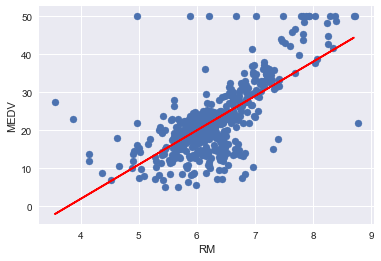

In [290]:
plt.scatter(data["RM"], data["MEDV"])
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.plot(X_train, model.coef * X_train + model.intercept, "r");

In [291]:
def plot_coeffs(model):
    plt.figure(figsize=(14, 5))
    plt.subplot(121)
    plt.plot(list(range(model.n_iter)), model.intercept_hist)
    plt.subplot(122)
    plt.plot(list(range(model.n_iter)), model.coef_hist);

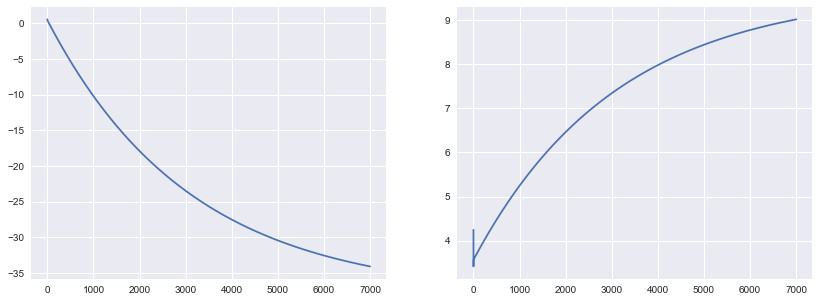

In [292]:
plot_coeffs(model)

In [42]:
def plot_loss_function(model):
    plt.xlabel("Iterations")
    plt.ylabel("Average square loss")
    plt.plot(np.arange(model.n_iter), model.loss_hist);

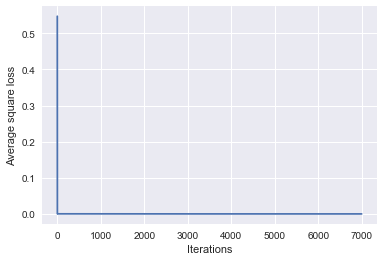

In [294]:
plot_loss_function(model)

## Оценка качества модели 

Итак, мы нашли коэффициенты $\theta$, теперь надо как-то оценить качество работы полученной модели. Для этого мы воспользуемся коэффициентом детерминации $R^2$:

$$R^2 = 1 - \frac{\sum_{i=1}^{m}(y_i - \hat{y_i})^2}{\sum_{i=1}^{m}(y_i - \overline{y})^2}$$

и среднеквадратичной ошибкой:

$$RMSE = \sqrt{\frac{\sum_{i=1}^{m}(\hat{y_i} - y_i)^2}{m}}$$

[Коэффициент детерминации](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%B4%D0%B5%D1%82%D0%B5%D1%80%D0%BC%D0%B8%D0%BD%D0%B0%D1%86%D0%B8%D0%B8) это доля дисперсии зависимой переменной, объясняемая рассматриваемой моделью. Более точно — это единица минус доля необъяснённой дисперсии (дисперсии случайной ошибки модели, или условной по признакам дисперсии зависимой переменной) в дисперсии зависимой переменной.

Среднеквадратичная ошибка характеризует отклонение реальных данных от линии регрессии и измеряется в тех же единицах, что и зависимая переменная ($y$).

Вашей задачей является написать две функции для вычисления коэфиициента детерминации и среднеквадратичной ошибки:

In [6]:
def rmse(hyp, y):
    m = len(y)
    t = sum([(y[i] - hyp[i]) ** 2 for i in range(m)])
    return math.sqrt(t / m)

In [7]:
def r_squared(hyp, y):
    m = len(y)
    mean = np.mean(y)
    numerator = sum([(hyp[i] - mean) ** 2 for i in range(m)])
    denominator = sum([(y[i] - mean) ** 2 for i in range(m)])
    return 1 - numerator / denominator

In [295]:
Y_pred = model.predict(X_test)

In [296]:
rmse(Y_pred, list(Y_test)), r_squared(Y_pred, list(Y_test))

(6.457011620118051, 0.40886369582144)

### Очистка датасета

In [8]:
indexNames = data[ data["RM"] < 4 ].index
data.drop(indexNames , inplace=True)

In [9]:
indexNames = data[ data["RM"] == 8.78 ].index
data.drop(indexNames , inplace=True)

In [10]:
indexNames = data[ data["MEDV"] == 50.0 ].index
data.drop(indexNames , inplace=True)

In [23]:
data.shape

(487, 14)

## Gradient descent на чистом датасете

In [50]:
X = data["RM"]
y = data["MEDV"]

In [302]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=18)

In [303]:
model = GDRegressor(alpha=0.03, n_iter=7000)
%time model.fit(X_train, Y_train)

Wall time: 4.05 s


(7.738827238354119, -27.027676578462156)

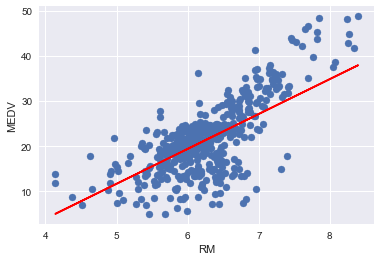

In [304]:
plt.scatter(data["RM"], data["MEDV"])
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.plot(X_train, model.coef * X_train + model.intercept, "r");

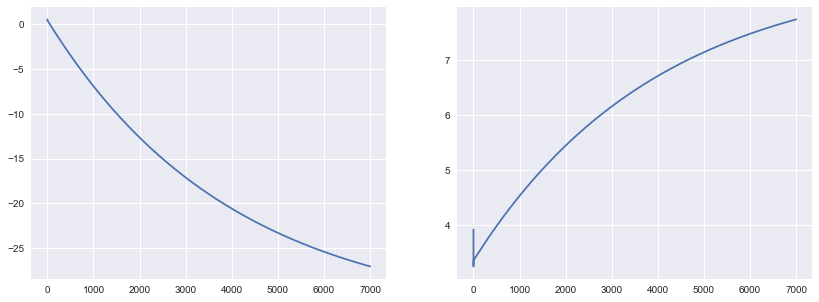

In [305]:
plot_coeffs(model)

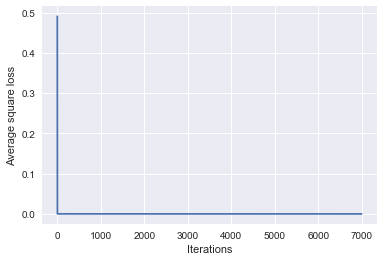

In [306]:
plot_loss_function(model)

## Нормализация

#### Standart Scaling (Z-score normalization):

In [12]:
def z_scaler(X):
    mean = np.mean(X)
    std_dev = math.sqrt(sum([(x - mean) ** 2 for x in X]) / (len(X) - 1))
    return [(x - mean) / std_dev for x in X]

In [308]:
X_scaled = z_scaler(X)

In [309]:
y_scaled = z_scaler(y)

In [335]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y_scaled, test_size=0.33, random_state=18)
model = GDRegressor(alpha=0.03, n_iter=1000)
model.fit(X_train, Y_train)

(0.6853009124822987, -0.03649189098953117)

In [332]:
Y_pred = model.predict(X_test)
rmse(Y_pred, Y_test), r_squared(Y_pred, Y_test)

(0.7436143319533478, 0.5328664703564271)

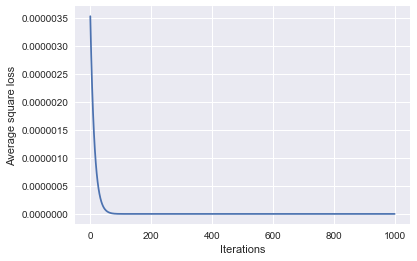

In [334]:
plt.xlabel("Iterations")
plt.ylabel("Average square loss")
plt.plot(np.arange(model.n_iter), model.loss_hist);

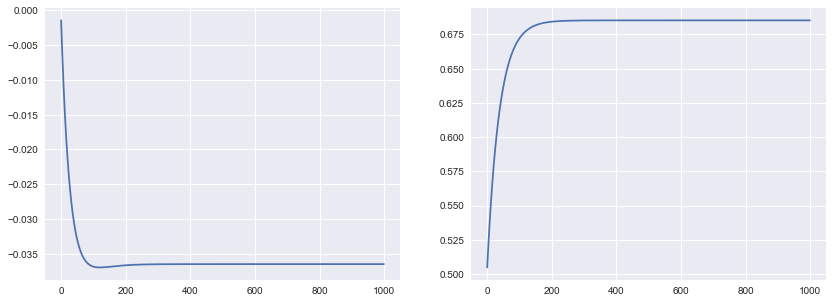

In [333]:
plt.figure(figsize=(14, 5))
plt.subplot(121)
plt.plot(list(range(model.n_iter)), model.intercept_hist)
plt.subplot(122)
plt.plot(list(range(model.n_iter)), model.coef_hist);

#### Min-max нормализация

In [20]:
def min_max(X):
    return [(x - min(X)) / (max(X) - min(X)) for x in X]

In [319]:
X_minmaxed = min_max(X)
y_minmaxed = min_max(y)

In [337]:
X_train, X_test, Y_train, Y_test = train_test_split(X_minmaxed, y_minmaxed, test_size=0.33, random_state=18)
model = GDRegressor(alpha=0.03, n_iter=2000)
model.fit(X_train, Y_train)

(0.7216578627295366, 0.014786669401807534)

In [338]:
Y_pred = model.predict(X_test)
rmse(Y_pred, Y_test), r_squared(Y_pred, Y_test)

(0.1384396198055275, 0.652004733442539)

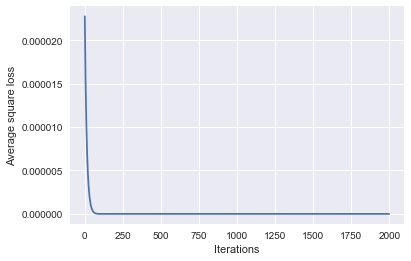

In [339]:
plt.xlabel("Iterations")
plt.ylabel("Average square loss")
plt.plot(np.arange(model.n_iter), model.loss_hist);

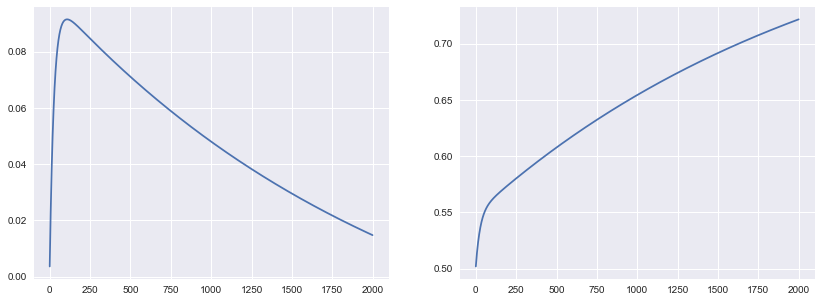

In [340]:
plt.figure(figsize=(14, 5))
plt.subplot(121)
plt.plot(list(range(model.n_iter)), model.intercept_hist)
plt.subplot(122)
plt.plot(list(range(model.n_iter)), model.coef_hist);

Нормализация методом min-max дает почти такой же коэффициент детерминации, но меньшую среднеквадратичную ошибку, чем при использовании Z-score нормализации => метод min-max дает лучший результат.

### Использование библиотеки sklearn

In [15]:
from sklearn.linear_model import SGDRegressor

max_iter = 5500
eta0 = 0.0001
model = SGDRegressor(
    loss='squared_loss',
    learning_rate='constant',
    max_iter=max_iter,
    eta0=eta0,
    alpha=0.002
)

In [26]:
from sklearn.preprocessing import StandardScaler

In [244]:
X = data[["RM"]]
y = data["MEDV"]

In [245]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.33, random_state = 18)

#### Нормализация 

In [27]:
x_scaler = StandardScaler()
y_scaler = StandardScaler()

In [247]:
X_train = x_scaler.fit_transform(np.array(X_train).reshape(-1, 1))
Y_train = y_scaler.fit_transform(np.array(Y_train).reshape(-1, 1))

In [248]:
X_test = x_scaler.transform(np.array(X_test).reshape(-1, 1))
Y_test = y_scaler.transform(np.array(Y_test).reshape(-1, 1))

In [202]:
model.fit(X_train, Y_train.ravel())

SGDRegressor(alpha=0.002, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0001, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=5500,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [198]:
Y_pred = model.predict(X_test)

#### Среднеквадратичная ошибка и коэф. детерминации

In [105]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [203]:
model.coef_, model.intercept_

(array([0.55125452]), array([8.76766697e-05]))

In [204]:
mean_squared_error(Y_test, Y_pred), r2_score(Y_test, Y_pred)

(0.4877474910448577, 0.4962004250424733)

### Gradient check

In [23]:
def gradient_check(x, th, e=1e-7):
    th_plus = th + e                               
    th_minus = th - e                             
    J_plus = np.dot(th_plus, x)                 
    J_minus = np.dot(th_minus, x)             
    grad_ = (J_plus - J_minus) / (2 * e)
    grad = x
    num = np.linalg.norm(grad - grad_)                   
    denom = np.linalg.norm(grad) + np.linalg.norm(grad_)   
    diff = num / denom                              
    if diff < 1e-7:
        print("Correct")
    else:
        print("Incorrect")
    
    return diff

In [218]:
th = model.coef_[0]

In [225]:
gradient_check(X_train, th, e=1e-7)

Correct


2.767539504008499e-10

In [226]:
th = model.intercept_[0]

In [227]:
gradient_check(X_train, th, e=1e-7)

Correct


1.8630605643891984e-14

In [235]:
th = 9.018356120414309

In [236]:
gradient_check(X_train, th, e=1e-7)

Correct


3.3375443317113698e-09

### Mini-Batch Gradient Descent

In [7]:
X = data[["RM"]]
y = data["MEDV"]

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=18)

In [11]:
class MiniBatchGDRegressor:

    def __init__(self, alpha=0.01, epochs=100, batch_size=10, progress=True):
        self.alpha = alpha
        self.disable = not progress
        self.epochs = epochs
        self.batch_size = batch_size
        
    def fit(self, X, y): 
        X = list(X['RM'])
        y = list(y)
        precision = 0.001
        m = len(X)
        th = [0.25] * 2
        th_old = [0] * 2
        grad = [0] * 2

        for j in range(self.epochs):
            th_old[0], th_old[1] = th[0], th[1]

            for k in range(0, m, self.batch_size):
                size = min(self.batch_size, m - k)
                start = k
                stop = k + size

                hyp = [th[0] + th[1] * X[i] for i in range(start, stop)]
                grad[0] = sum([hyp[i - start] - y[i] for i in range(start, stop)]) / size
                grad[1] = sum([(hyp[i - start] - y[i]) * X[i] for i in range(start, stop)]) / size

                th[0] -= self.alpha * grad[0]
                th[1] -= self.alpha * grad[1]

            if j != 0 and abs(th[0] - th_old[0]) < precision and abs(
                    th[1] - th_old[1]) < precision:
                break

        self.intercept_, self.coef_ = th[0], th[1]
        return self.intercept_, self.coef_

    def predict(self, X_test):
        y = [0] * len(X_test)
        for i in range(len(y)):
            y[i] = self.intercept_ + self.slope_ * X_test[i]
        return y

In [18]:
model = MiniBatchGDRegressor(alpha=0.03, epochs=7000, batch_size=200)
%time model.fit(X_train, Y_train)

Wall time: 581 ms


(-37.760271737062325, 9.415990623696022)

In [21]:
th = model.coef_

In [24]:
gradient_check(X_train, th, e=1e-7)

Correct


3.4036157051027425e-09

In [25]:
th = model.intercept_

In [26]:
gradient_check(X_train, th, e=1e-7)

Correct


7.93277751363239e-09

## Кривые обучения 

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

In [14]:
train_sizes = [1, 50, 100, 200, 404]

In [11]:
features = ['RM', 'LSTAT']
target = 'MEDV'

In [12]:
train_sizes, train_scores, validation_scores = learning_curve(estimator = LinearRegression(), X = data[features], y = data['MEDV'],
train_sizes = train_sizes, cv = 5, scoring = 'neg_mean_squared_error')

In [15]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

(0, 100)

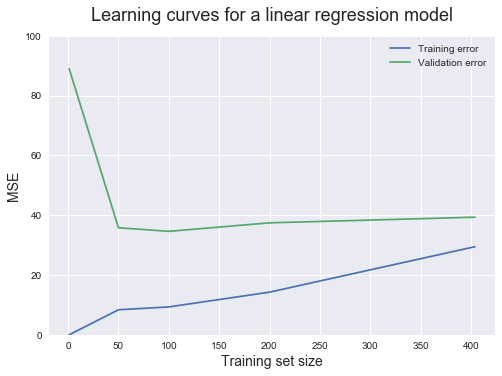

In [16]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,100)

# Многомерная линейная регрессия

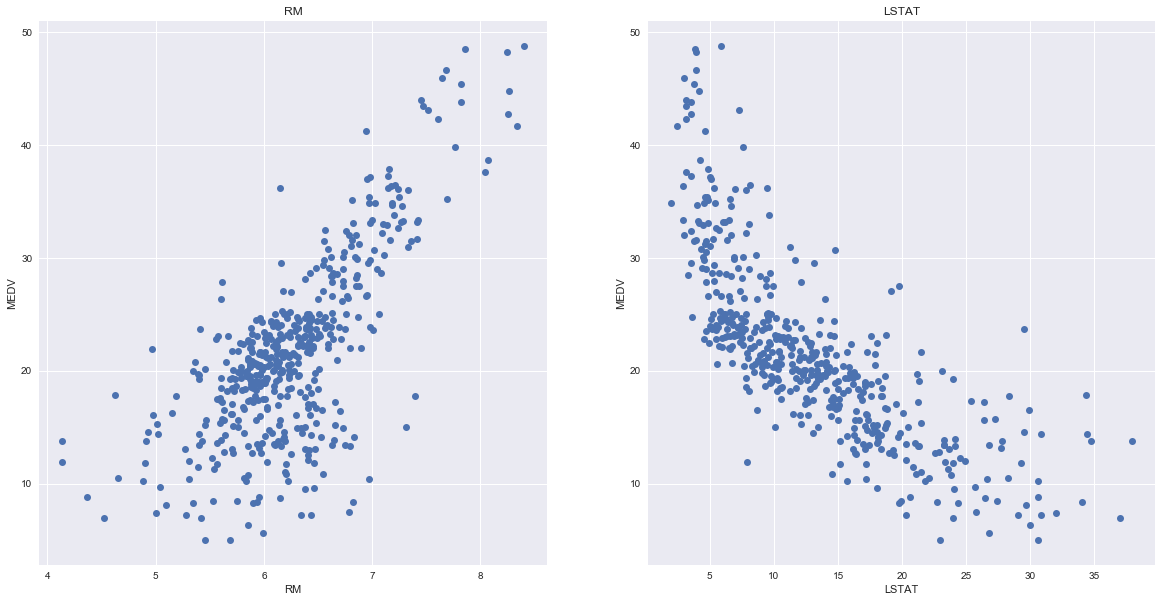

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
for i, col in enumerate(["RM", "LSTAT"]):
    plt.subplot(1, 2, (i+1))
    plt.plot(data[col], data["MEDV"], 'o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

Зависимости показаны для уже очищенного датасета

In [32]:
def z_scaler(feature):
    return (feature - feature.mean()) / feature.std()

In [33]:
X_filtered = data[(data["MEDV"] < 50)][["RM", "LSTAT"]]
y_filtered = data[(data["MEDV"] < 50)]["MEDV"]

In [34]:
X_scaled = z_scaler(X_filtered)
y_scaled = z_scaler(y_filtered)

In [89]:
class GDRegressor:
    def __init__(self, alpha=0.01, n_iter=100):
        self.alpha = alpha
        self.n_iter = n_iter

    def fit(self, X, y): 
        X = np.hstack([np.ones((len(X), 1)), X]) #output horizontally stacked array 
        theta = np.zeros(X.shape[1]) #we make a vector, which length is equal to the amount of features
        self.theta_history = theta.copy()
        m = len(X)

        for i in range(self.n_iter):
            error = X @ theta - y # (1)
            gradient = (1/m) * (X.T @ error) #(2)
            theta -= self.alpha * gradient # (3)
            self.theta_history = np.vstack([self.theta_history, theta])
        
        self.theta = theta
        self.intercept_ = theta[0]
        self.coef_ = theta[1:]

    def predict(self, X_test):
        X_test = np.hstack([np.ones((len(X_test), 1)), X_test])
        answers = X_test.dot(self.theta)
        return answers
    
    def lasso(self, X, y):
        lasso = Lasso(max_iter=2500)
        parametres = {'alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
        self.lasso_regressor = GridSearchCV(lasso, parametres, scoring='neg_mean_squared_error', cv=5)
        self.lasso_regressor.fit(X_1_filtered, y_1_filtered)
        return self.lasso_regressor.best_params_, self.lasso_regressor.best_score_

In [41]:
X_train, X_test, Y_train, Y_test =\
    train_test_split(X_scaled, y_scaled, test_size=0.33, random_state=18)
model = GDRegressor(alpha=0.01, n_iter=300)
%time model.fit(X_train, Y_train)

Wall time: 78 ms


In [47]:
def rmse(y_hat, y): 
    y = y.values.tolist()
    m = len(y)
    sum = 0
    for i in range(m):
        sum += (y_hat[i] - y[i])**2
    rm = np.sqrt(sum/m)
    return rm

In [48]:
def r_squared(y_hat, y): 
    y = y.values.tolist()
    m = len(y)
    sum = 0
    y_mean = np.mean(y)
    sum1 = 0
    for i in range(m):
        sum += (y[i] - y_hat[i])**2
        sum1 += (y[i] - y_mean)**2
    r = 1 - sum/sum1
    return r

In [49]:
Y_pred = model.predict(X_test)
rmse(Y_pred, Y_test), r_squared(Y_pred, Y_test)

(0.6391360648770337, 0.6848103483287687)

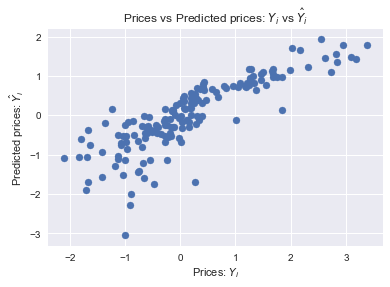

In [50]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$");

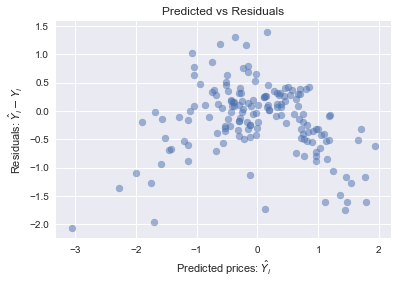

In [51]:
plt.xlabel("Predicted prices: $\hat{Y}_i$")
plt.ylabel("Residuals: $\hat{Y}_i - Y_i$")
plt.title("Predicted vs Residuals");
plt.scatter(Y_pred, (Y_pred - Y_test.ravel()), alpha=0.5);

В остатках нелинейная зависимость (парабола во втором случае и функция вида sqrt(x) в первом). Это происходит из-за того, что что процент жителей с низким социальным статусом нелинейно зависит от средней цены на дом и среднего числа комнат: 

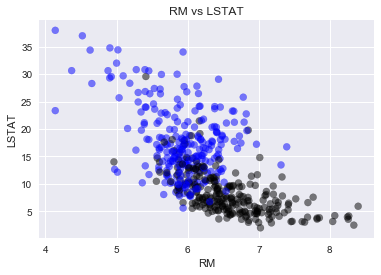

In [52]:
colors = ['k' if v > data["MEDV"].median() else 'b' for v in data["MEDV"]]
plt.scatter(data["RM"], data["LSTAT"], c=colors, alpha=0.5)
plt.xlabel("RM");
plt.ylabel("LSTAT");
plt.title("RM vs LSTAT")
plt.show()

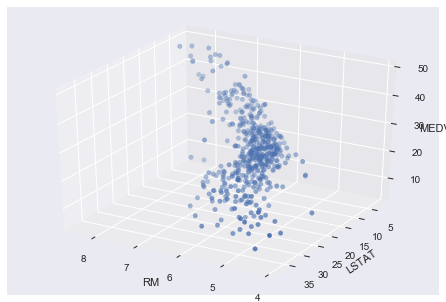

In [53]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()#figsize=(15, 10))
ax = Axes3D(fig)
ax.set_xlabel('RM')
ax.set_ylabel('LSTAT')
ax.set_zlabel('MEDV');
ax.view_init(azim=120)
ax.scatter3D(data["RM"], data["LSTAT"], data["MEDV"])
plt.show()

Так как подобная зависимость не описывается моделью, то в нее нужно добавить полиномиальные признаки.

## Добавление полиноминальных признаков

Для описания нелинейной зависимости мы будем использовать полиномиальную модель. Предположим, что полинома четвертой степени достаточно для описания зависимости. Возможно будет достаточно полинома второй или третьей степени, поэтому, чтобы «занулить» некоторые коэффициенты  θ , мы будем использовать L1-регуляризацию.

In [54]:
from sklearn.preprocessing import PolynomialFeatures

In [55]:
poly = PolynomialFeatures(4, include_bias=False)
X_filtered_poly = poly.fit_transform(X_filtered)

In [56]:
X_train, X_test, Y_train, Y_test =\
    train_test_split(X_filtered_poly, y_filtered, test_size = 0.33, random_state = 18)
x_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train = x_scaler.fit_transform(X_train)
Y_train = y_scaler.fit_transform(Y_train.values.reshape(-1, 1))
X_test = x_scaler.transform(X_test)
Y_test = y_scaler.transform(Y_test.values.reshape(-1, 1))

In [57]:
model = SGDRegressor(
    loss='squared_loss',
    penalty='l1',
    alpha=0.01,
    learning_rate='constant',
    max_iter=1000,
    eta0=0.005
)
model.fit(X_train, Y_train.ravel())

SGDRegressor(alpha=0.01, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.005, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l1', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [58]:
Y_pred = model.predict(X_test)

In [59]:
mean_squared_error(Y_test, Y_pred), r2_score(Y_test, Y_pred)

(0.2830132464801696, 0.8183342987898488)

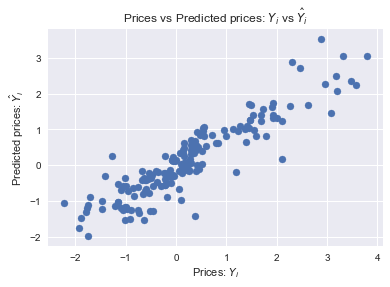

In [60]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$");

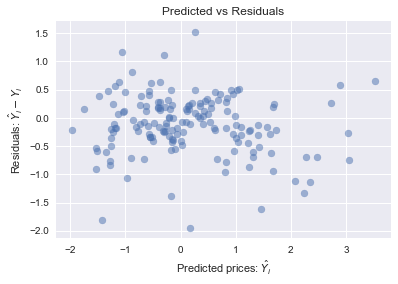

In [61]:
fig = plt.figure()
plt.scatter(Y_pred, (Y_pred-Y_test.reshape(1, -1)), alpha=0.5);
plt.xlabel("Predicted prices: $\hat{Y}_i$")
plt.ylabel("Residuals: $\hat{Y}_i - Y_i$")
plt.title("Predicted vs Residuals");
fig.savefig('lr_residuals3.png', dpi=fig.dpi)

In [62]:
model.coef_, model.intercept_

(array([ 0.        ,  0.        ,  0.01695935,  0.        ,  0.        ,
         0.18527664, -0.15146409,  0.        ,  0.        ,  0.35264272,
        -0.35212903,  0.        ,  0.        ,  0.01654009]),
 array([-0.00749247]))

In [63]:
poly.get_feature_names(X_filtered.columns)

['RM',
 'LSTAT',
 'RM^2',
 'RM LSTAT',
 'LSTAT^2',
 'RM^3',
 'RM^2 LSTAT',
 'RM LSTAT^2',
 'LSTAT^3',
 'RM^4',
 'RM^3 LSTAT',
 'RM^2 LSTAT^2',
 'RM LSTAT^3',
 'LSTAT^4']

### Отбор лучших признаков

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487 entries, 0 to 505
Data columns (total 14 columns):
CRIM       487 non-null float64
ZN         487 non-null float64
INDUS      487 non-null float64
CHAS       487 non-null float64
NOX        487 non-null float64
RM         487 non-null float64
AGE        487 non-null float64
DIS        487 non-null float64
RAD        487 non-null float64
TAX        487 non-null float64
PTRATIO    487 non-null float64
B          487 non-null float64
LSTAT      487 non-null float64
MEDV       487 non-null float64
dtypes: float64(14)
memory usage: 57.1 KB


In [66]:
train_sizes = [1, 50, 100, 200, 388]

In [67]:
target = 'MEDV'

In [68]:
features = ['RM', 'LSTAT']

In [64]:
def learning_curves(estimator, data, features, target, train_sizes, cv):
    train_sizes, train_scores, validation_scores = learning_curve(
    estimator, data[features], data[target], train_sizes =
    train_sizes,
    cv = cv, scoring = 'neg_mean_squared_error')
    train_scores_mean = -train_scores.mean(axis = 1)
    validation_scores_mean = -validation_scores.mean(axis = 1)

    plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

    plt.ylabel('MSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    title = str(features)
    plt.title(title, fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0,100)

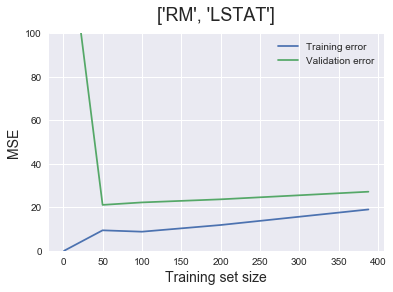

In [69]:
lstat = ['RM', 'LSTAT']
learning_curves(LinearRegression(), data, lstat, target, train_sizes, cv=5)

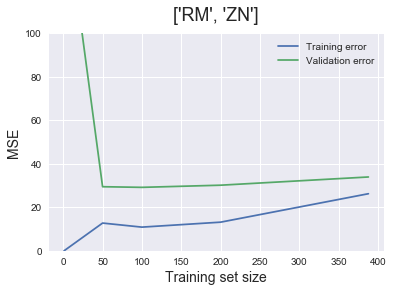

In [70]:
zn = ['RM', 'ZN']
learning_curves(LinearRegression(), data, zn, target, train_sizes, cv=5)

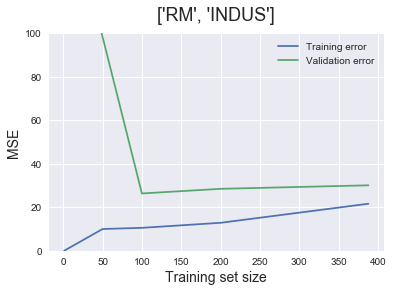

In [71]:
indus = ['RM', 'INDUS']
learning_curves(LinearRegression(), data, indus, target, train_sizes, cv=5)

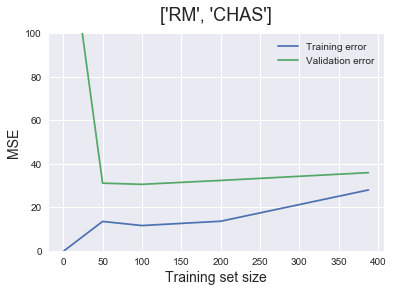

In [72]:
chas = ['RM', 'CHAS']
learning_curves(LinearRegression(), data, chas, target, train_sizes, cv=5)

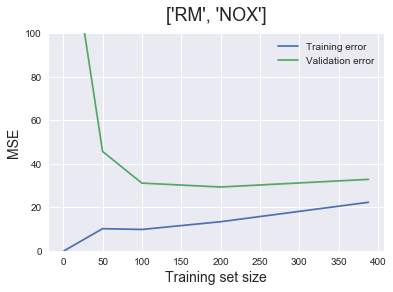

In [73]:
nox = ['RM', 'NOX']
learning_curves(LinearRegression(), data, nox, target, train_sizes, cv=5)

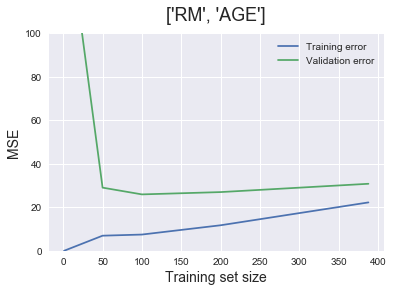

In [74]:
age = ['RM', 'AGE']
learning_curves(LinearRegression(), data, age, target, train_sizes, cv=5)

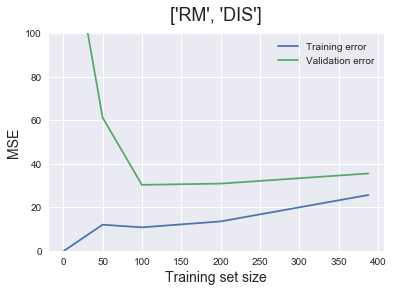

In [78]:
dis = ['RM', 'DIS']
learning_curves(LinearRegression(), data, dis, target, train_sizes, cv=5)

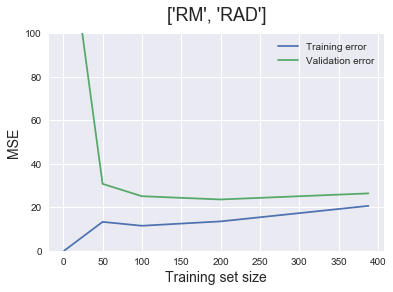

In [79]:
rad = ['RM', 'RAD']
learning_curves(LinearRegression(), data, rad, target, train_sizes, cv=5)

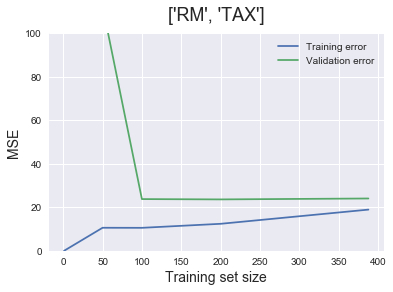

In [80]:
tax = ['RM', 'TAX']
learning_curves(LinearRegression(), data, tax, target, train_sizes, cv=5)

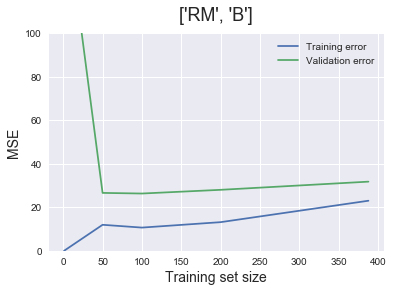

In [81]:
b = ['RM', 'B']
learning_curves(LinearRegression(), data, b, target, train_sizes, cv=5)

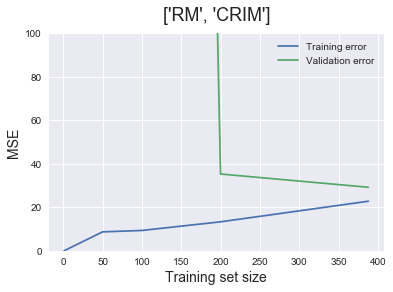

In [83]:
crim = ['RM', 'CRIM']
learning_curves(LinearRegression(), data, crim, target, train_sizes, cv=5)

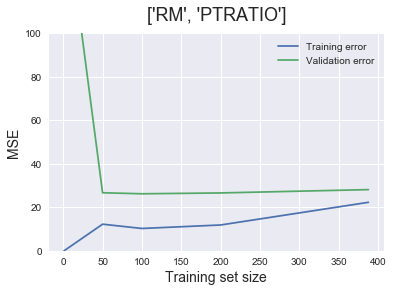

In [82]:
p = ['RM', 'PTRATIO']
learning_curves(LinearRegression(), data, p, target, train_sizes, cv=5)

Если визуально определить наименьшее расстояние между двумя кривыми обучения, это оказываются признаки TAX ( величина налога в $10000) и PTRATIO (количество учащихся, приходящихся на одного учителя (по городу))

In [84]:
X_filtered = data[(data["MEDV"] < 50)][["RM", "LSTAT", "TAX", "PTRATIO"]]
y_filtered = data[(data["MEDV"] < 50)]["MEDV"]

In [85]:
X_scaled = z_scaler(X_filtered)
y_scaled = z_scaler(y_filtered)

In [86]:
X_train, X_test, Y_train, Y_test =\
    train_test_split(X_scaled, y_scaled, test_size=0.33, random_state=18)
model = GDRegressor(alpha=0.01, n_iter=300)
model.fit(X_train, Y_train)

In [87]:
Y_pred = model.predict(X_test)

In [88]:
r_squared(Y_pred, Y_test), rmse(Y_pred, Y_test)

(0.7582317650182937, 0.5597665841675834)

### L2 регуляризация

In [34]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

In [26]:
X = boston.data
Y = boston.target
names= boston['feature_names']

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=31)

In [41]:
lasso = Lasso()
lasso.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [42]:
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

In [43]:
print("training score:", train_score) 
print("test score: ", test_score)
print ("number of features used: ", coeff_used)

training score: 0.6689764459176661
test score:  0.7388953630087362
number of features used:  11


In [38]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [39]:
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)

In [40]:
print("training score for alpha=0.01:", train_score001) 
print("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)

training score for alpha=0.01: 0.7244472836262167
test score for alpha =0.01:  0.7547067165510453
number of features used: for alpha =0.01: 13


In [44]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)

In [45]:
print("LR training score:", lr_train_score) 
print("LR test score: ", lr_test_score)

LR training score: 0.7248217414711897
LR test score:  0.7567743451802437


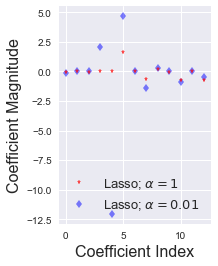

In [46]:
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)